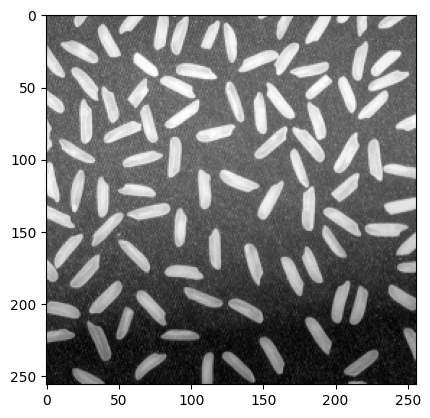

(256, 256)


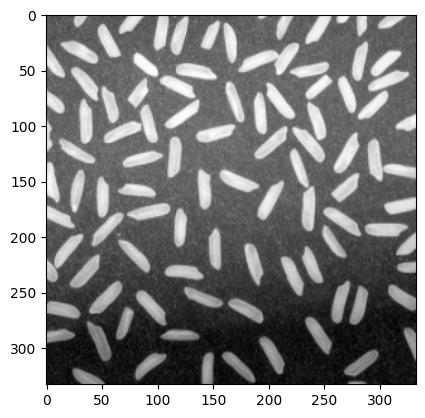

(333, 333)


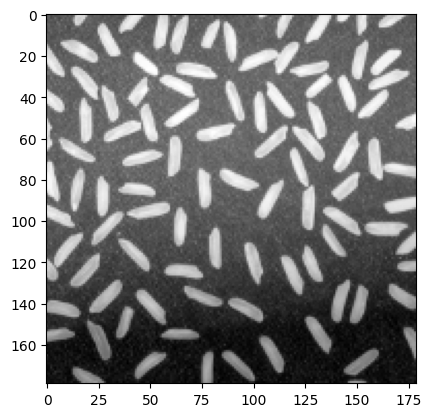

(179, 179)


In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import math

def BiLinear_interpolation(img,dim):#dim is a 1×2 vector, representing the height and weight of interpolation
    scrH,scrW=img.shape
    retimg=np.zeros((dim[0],dim[1]),dtype=np.uint8)
    scale_x=float(scrW)/dim[1]
    scale_y=float(scrH)/dim[0]
    
    for i in range(dim[0]):
        for j in range(dim[1]):
            #根据几何中心重合找出目标像素点映射回原像素的位置
            src_x=(j+0.5)*scale_x-0.5
            src_y=(i+0.5)*scale_y-0.5
            #找出最邻近的四个像素点
            src_x0=int(np.floor(src_x))#报告中解释int, floor,防止溢出0边界
            src_x1=min(src_x0+1,scrW-1)#防止溢出边界
            src_y0=int(np.floor(src_y))
            src_y1=min(src_y0+1,scrH-1)
            
            #代入公式计算
            if src_x1-src_x0==0 and src_y1-src_y0==0:
                retimg[j,i]=img[src_x0,src_y0]
            elif src_x1-src_x0==0:
                retimg[j,i]=(src_y1-src_y)/(src_y1-src_y0)*img[src_x0,src_y0]+(src_y-src_y0)/(src_y1-src_y0)*img[src_x0,src_y1]
            elif src_y1-src_y0==0:
                retimg[j,i]=(src_x1-src_x)/(src_x1-src_x0)*img[src_x0,src_y0]+(src_x-src_x0)/(src_x1-src_x0)*img[src_x1,src_y0]
            else:
                temp0=(src_x1-src_x)/(src_x1-src_x0)*img[src_x0,src_y0]+(src_x-src_x0)/(src_x1-src_x0)*img[src_x1,src_y0]
                temp1=(src_x1-src_x)/(src_x1-src_x0)*img[src_x0,src_y1]+(src_x-src_x0)/(src_x1-src_x0)*img[src_x1,src_y1]
                retimg[j,i]=(src_y1-src_y)/(src_y1-src_y0)*temp0+(src_y-src_y0)/(src_y1-src_y0)*temp1
    return retimg

image=plt.imread('rice.tif')
plt.imshow(image,cmap=plt.cm.gray)
plt.show()
print(image.shape)
dim1=np.array([round(256*1.3),round(256*1.3)])
image1=BiLinear_interpolation(image,dim1)
plt.imshow(image1,cmap=plt.cm.gray)
plt.show()
print(image1.shape)
savedimage1=Image.fromarray(image1)
savedimage1.save('enlarged_bilinear_张旭东.tif')
dim2=np.array([round(256*(1-0.3)),round(256*(1-0.3))])
image2=BiLinear_interpolation(image,dim2)
plt.imshow(image2,cmap=plt.cm.gray)
plt.show()
print(image2.shape)
savedimage2=Image.fromarray(image2)
savedimage2.save('shrunk_bilinear_张旭东.tif')
            
